## BUSINESS PROBLEM

### DATA UNDERSTANDING

The columns available are:

Loan Id - Unique Identifer for each loan application

Gender - The Gender of the loan applicant

Married - Indicates whether the applicant is married or not.

Dependants - The number of dependants the applicant has

Education - The level of education of the applicant

Self-employed - Whether the applicant is self-employed or not

ApplicantIncome - The income of the applicant

CoapplicantIncome - Income of the coapplicant if any

LoanAmount - Amount of loan requested by the applicant

Loan_Amount_Term - The duration of the loan in months

Credit_History - Indicates the credit history of the applicant.IF they have a good credit history or not

Property_Area - The area where the property of the applicant is located

Loan_Status - Status of the loan application. Y(Yes) for approved and N(No) for not approved

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Loading the data

data = pd.read_csv('train_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Creating a copy of the dataset

data2 = data.copy()
data2.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### We'll work with the copy of the data

In [4]:
# Checking the shape of the data

data2.shape

(614, 13)

Our data has 13 columns and 614 rows

In [5]:
# Data info

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Observation

There are some missing values according to the information above

There are both numerical(float and integer)and categorical columns

### DATA CLEANING

### 1.Gender

In [6]:
data2['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
data2['Gender'].isna().sum()

13

In [8]:
# Checking rows with missing values in the gender column

data2[data2['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


Filling missing values in the Gender column with missing or unknown as it is a categorical column

In [9]:
data2['Gender'] = data2['Gender'].fillna('Missing')

In [10]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Now gender has no missing values

### 2.Married 

In [12]:
# Viewing rows with missing values in the Married Column

data2[data2['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [13]:
# Filling in the missing values of the Married column

data2.fillna({'Married': 'Unknown'},inplace=True)

### 3.Dependents

In [14]:
# Filling missing values of the dependents column 

data2.fillna({'Dependents':'Missing'},inplace=True)

### 4.Self Employed

In [15]:
# Missing values in self employed column

In [16]:
# Checking what values the self employed column contain

data2['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
# Filling missing values in the Self Employed column

data2.fillna({'Self_Employed':'Unknown'},inplace=True)

In [18]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 5.LoanAmount

In [19]:
data2['LoanAmount'].dtype

dtype('float64')

In [20]:
data2['LoanAmount'].isna().sum()

22

In [21]:
# Checking missing values for the float column(Loan Amount)
data2[data2['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Unknown,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,Missing,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [22]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: ylabel='LoanAmount'>

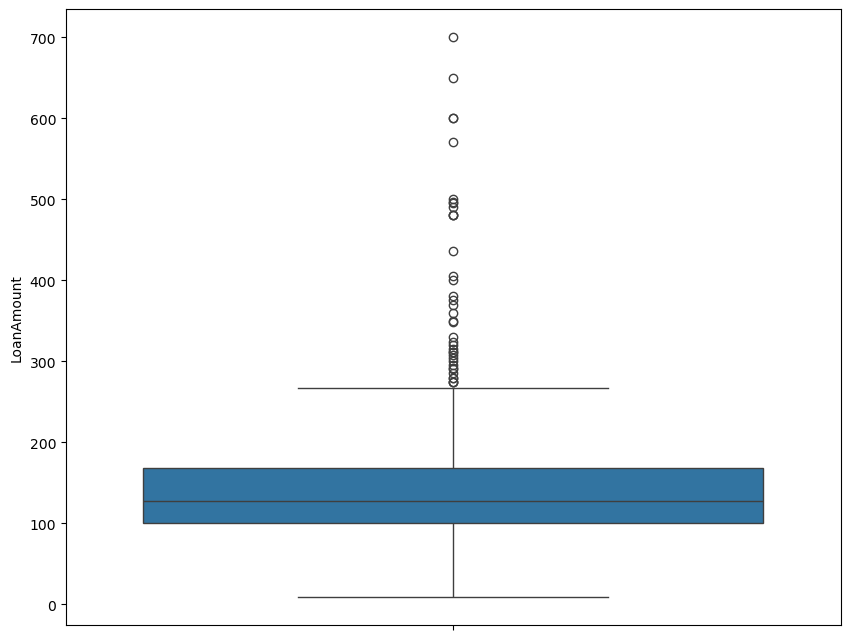

In [23]:
# Checking if the data is normally distributed and does not have outliers so as to impute Loan Amount with mean

plt.figure(figsize=(10,8))
sns.boxplot(data2['LoanAmount'])

Since Loan Amount has outliers, and mean is affected by outliers, then the missing values will be filled with median

Text(0, 0.5, 'Frequency')

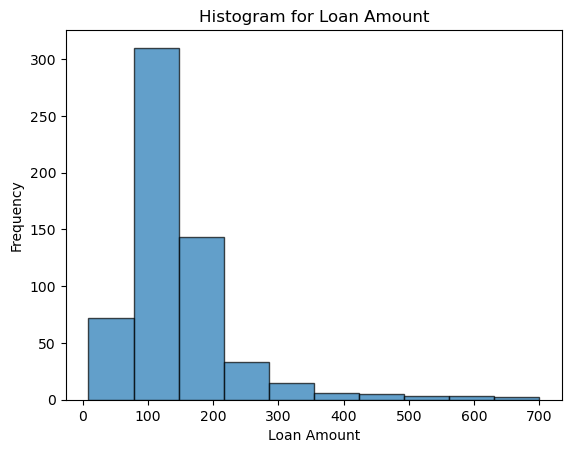

In [24]:
plt.hist(data2['LoanAmount'],edgecolor='k',alpha=0.7)
plt.title('Histogram for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

The above histogram does not form a symmetric bell curve or bell shape. Meaning that Loan Amount is not normally distributed.
This and the fact that the column has outliers means that the better option for filling in missing values in this column is median

### Filling in missing values in the LoanAmount column with the median

In [25]:
data2['LoanAmount'] = data2['LoanAmount'].fillna(data2['LoanAmount'].median())

In [26]:
# Checking if there are still missing values in that column

data2['LoanAmount'].isna().sum()

0

So there are no missing values in the LoanAmount Column. Now let's check which other columns have missing values

In [27]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 6.Credit History

In [28]:
data2['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

475 loan applicants have a good credit history and 89 applicants have a bad credit history

In [29]:
data2['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

If I fill the credit history column values with 0 or 1, I will be making my data bias because I'll be giving people with bad credit history a good one and the opposite is true.

So I'll instead drop the rows with missing values in the credit history column

In [30]:
data2 = data2.dropna(subset=['Credit_History'])

In [31]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Changing the data type of Credit History from float to int so that we can have binary(1 for good credit history and 0 for a bad credit history) instead of 1.0 and 0.0
Binary will be an easier format to understand compared to float values.There's no way one can have a credit history of 1.0 or 0.5

In [32]:
data2['Credit_History'] = data2['Credit_History'].astype(int)

### 7. Loan_Amount_Term

The only remaining column that we haven't cleared the missing values is the Loan_Amount_Term

In [33]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

In [34]:
data2['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    470
180.0     43
480.0     14
300.0     10
120.0      3
240.0      3
84.0       3
60.0       2
36.0       2
Name: count, dtype: int64

In [35]:
data2['Loan_Amount_Term'].median()

360.0

In [36]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

For handling the missing values in the Loan Amount Term column, I will not drop the missing values because it'll lead to loss of data.
And because there are only 14 missing values, filling them with one of the measures of central tendency will not really lead to bias in the data cause it's a small percentage of missing data.

Hence for me to know what central measure of tendecy I will use, I'll check for outliers and normality in the data just like I did with the LoanAmount column

<Axes: >

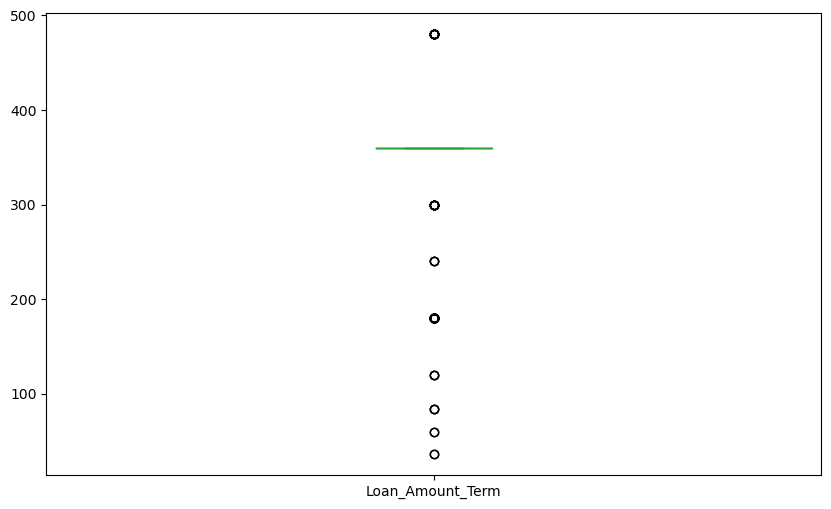

In [37]:
# Checking for outliers using a box plot

data2['Loan_Amount_Term'].plot(kind='box', figsize=(10,6))

From the above plot, there are very few, close to none extreme values in the Loan Amount Term column.

In [38]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [39]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    int32  
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 59.5+ KB


In [41]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

Checking for normality on the Loan Amount Column using a histogram

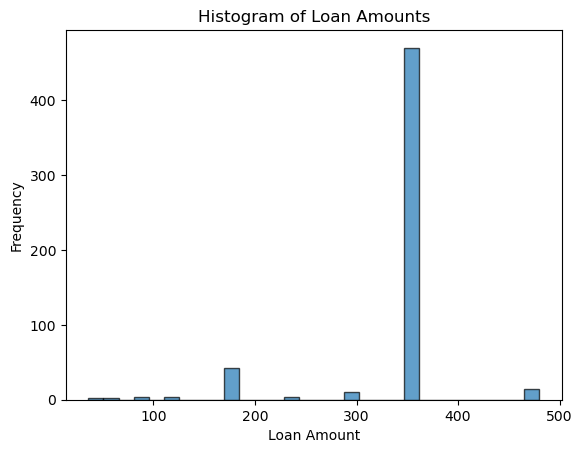

In [42]:
plt.hist(data2['Loan_Amount_Term'],bins=30,edgecolor='k',alpha=0.7)
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

From the above histogram, the data for Loan Amount is not normally distributed because the histogram could have formed a bell shape/symmetric bell curve.It does not form a peak at the center.

Because of this, I'll fill the missing values in this column with the median as it appropriate for data that does not follow a normal distribution

In [43]:
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term'].fillna(data2['Loan_Amount_Term'].median())

In [44]:
# Checking if the Loan Amount Column still has missing values

data2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we've dealt with the missing values in each column

In [45]:
# Checking the data once again to show what we can correct in any of the columns

data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [46]:
# Checking the data types of each column

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    int32  
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 59.5+ KB


### DATA VISUALIZATION

#### 1.UNIVARIATE ANALYSIS

Gender Column

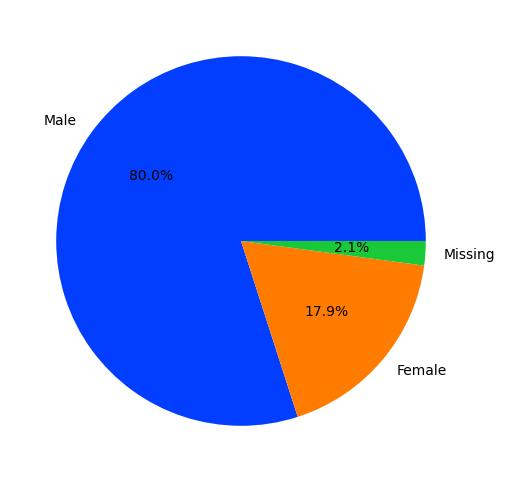

In [47]:
# Using a pie chart to represent the gender column

value_counts = data2['Gender'].value_counts()
labels = value_counts.index
counts = value_counts.values

# PlottinG
plt.figure(figsize=(8,6))
plt.pie(counts, labels=labels, colors=sns.color_palette('bright'), autopct='%.1f%%')
plt.show()

In [48]:
# Creating a function for columns that need pie charts

def pie_chart(column_name):
    value_counts = data2[column_name].value_counts()
    labels = value_counts.index
    counts = value_counts.values

    # Plotting
    plt.figure(figsize=(8,6))
    plt.pie(counts,labels=labels,colors=sns.color_palette('bright'),autopct='%.1f%%')

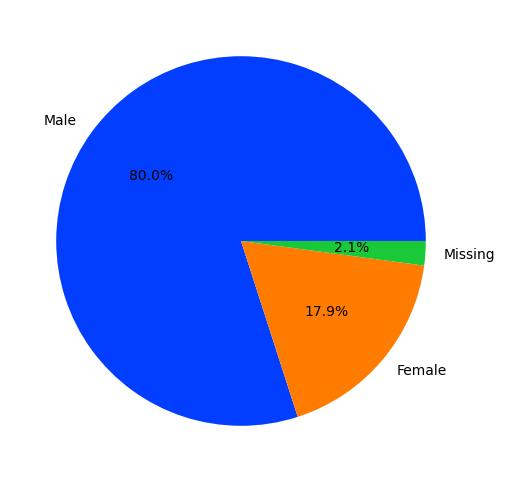

In [49]:
# Gender

pie_chart('Gender')

From the Gender column, most loan applicants are Male.This can be attributed to the following reasons:

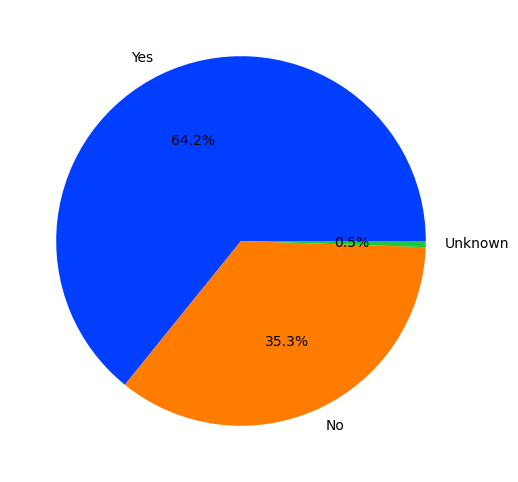

In [50]:
# Married

pie_chart('Married')

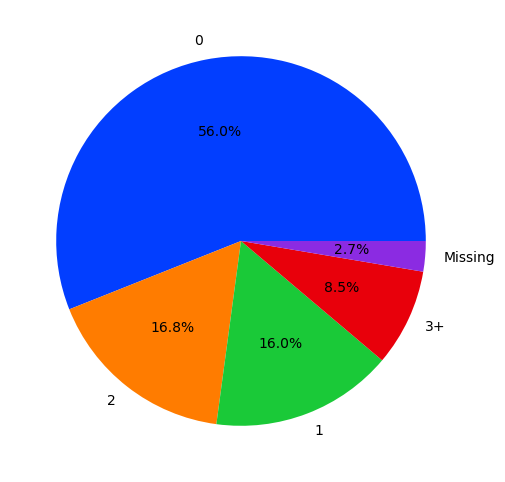

In [51]:
# Dependents

pie_chart('Dependents')

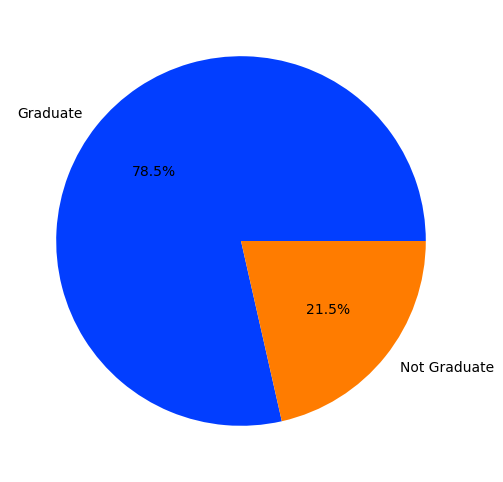

In [52]:
pie_chart('Education')

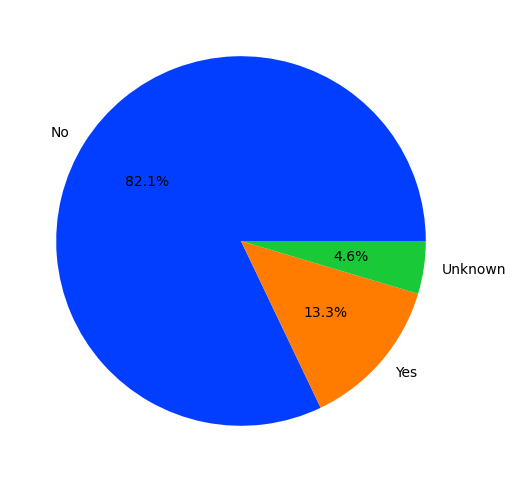

In [53]:
# Self employed

pie_chart('Self_Employed')

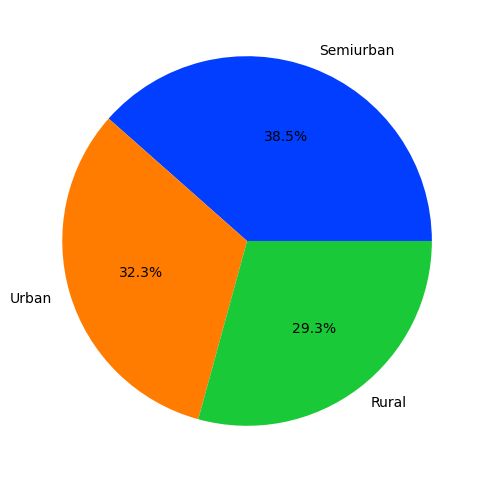

In [54]:
# Property Area

pie_chart('Property_Area')

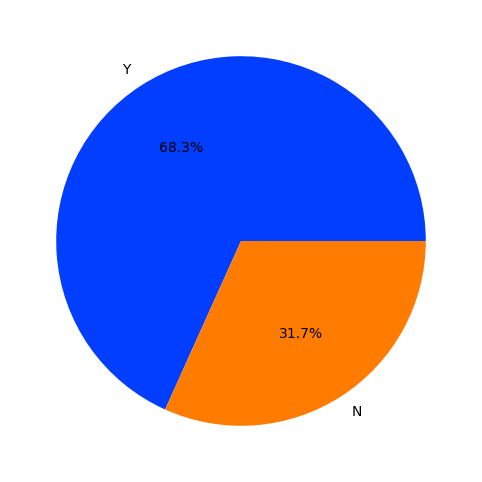

In [55]:
# Loan Status

pie_chart('Loan_Status')

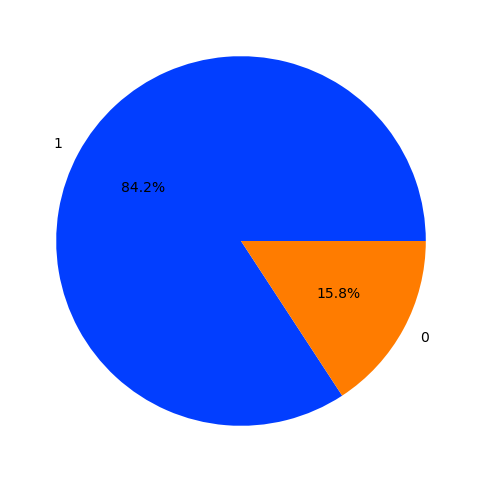

In [56]:
# Credit History

pie_chart('Credit_History')

### Bivariate Analysis

In [57]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

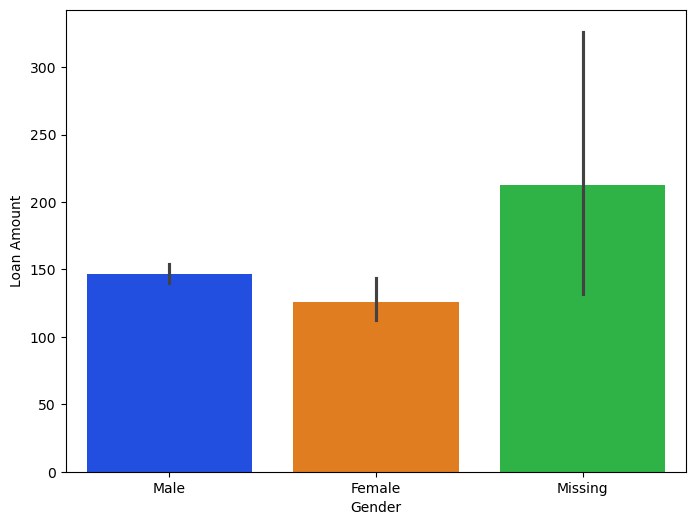

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x=data2['Gender'],y=data2['LoanAmount'],palette=sns.color_palette('bright',3),hue=data2['Gender'])
plt.ylabel('Loan Amount')
plt.xlabel('Gender')
plt.show()

From the vizz, Male take higher amounts of loans compared to Female.This may be attributed to the following reasons:


Education vs Loans

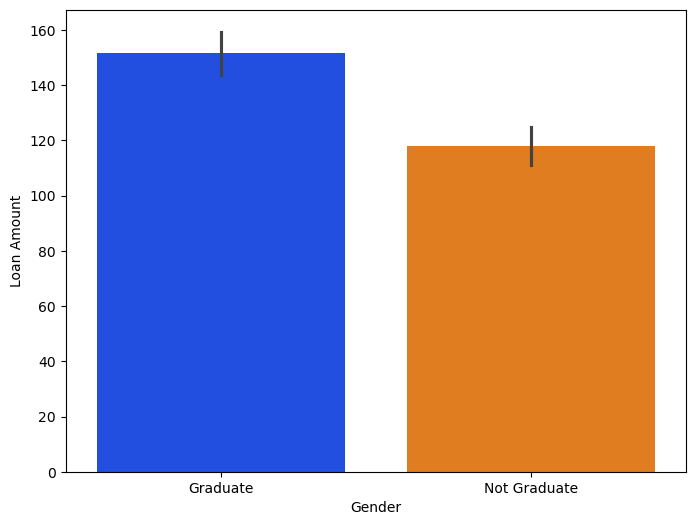

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x=data2['Education'], y=data2['LoanAmount'],palette=sns.color_palette('bright',2),hue=data2['Education'])
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

Graduates take the highes loan amounts as compared to non-graduates

Education vs LoanAmount

In [70]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [78]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [99]:
import plotly.express as px

# Creating the figure
fig = px.bar(data2, x='Education', y='LoanAmount',color='Education',color_discrete_sequence=['blue','orange'])

# Show the figure
fig.show()

Most graduates take higher loan amounts as compared to non-graduates.This may be due to graduates having jobs and can afford to pay for the loans they take.Hence they take higher amounts of loans unlike non-graduates

In [92]:
# Creating the figure
px.bar(data2, x='Self_Employed', y='LoanAmount')


In [138]:
px.bar(data2, x='Property_Area', y='LoanAmount',color='Property_Area',color_discrete_sequence=['cornflowerblue','coral','green'])

In [97]:
px.bar(data2, x='Loan_Status')


In [61]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
px.bar(data2, x='Dependents', y='LoanAmount',color='Dependents',color_discrete_sequence=['cornflowerblue','coral','green','red','black'])

In [117]:
px.histogram(data2,x='ApplicantIncome',nbins=20)

From the histogram above, most people earn less than 25k

In [122]:
# px.bar(data2, x='Property_Area', y='Loan_Amount_Term',color='Property_Area',color_discrete_sequence=['cornflowerblue','coral','green'])

In [121]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

MULTIVARIATE ANALYSIS

In [131]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

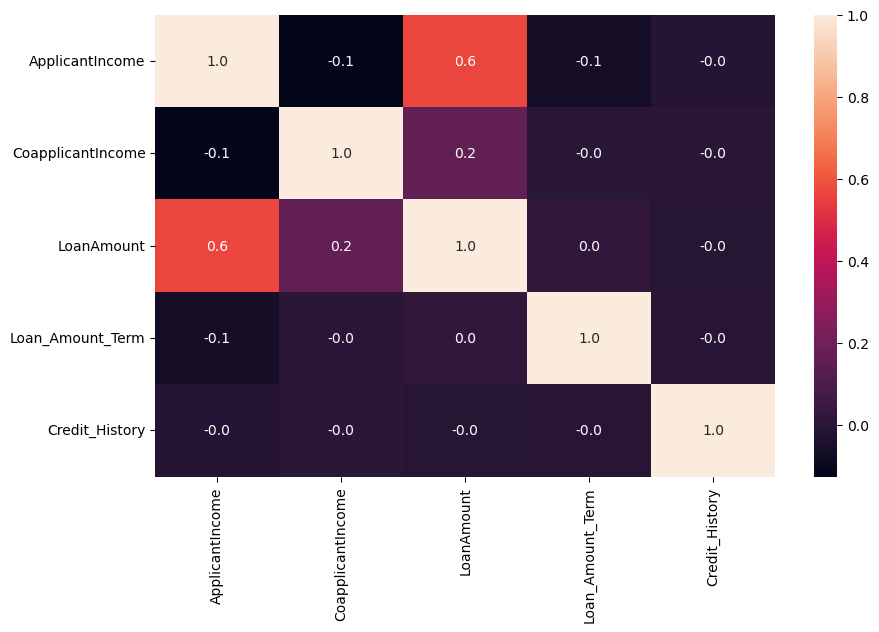

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(data2[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(),annot=True,fmt='.1f')

From the heat map, Loan Amount and Applicant Income have a strong positive correlation of 0.6. This is sensible because the amount of loan one takes depend on the income they get.

For a low income, one can't take huge amount of loans cause of the struggle in paying up the loan.

If one has a high income, they are capable of taking loans because they can pay up in time